In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import datetime
import io
import PIL

In [ ]:
def clean_text(a_string): return a_string.replace("\t", "")

def change_format(a_string):
    if len(a_string) == 1: return "0"+a_string
    else: return a_string

def to_date_obj(a_string):
    d, m, y = a_string.split("/")
    d = change_format(d); m = change_format(m)
    date_str = d+m+y

    format_str = '%d%m%Y' # The format
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    return datetime_obj.date()

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/DS/dataCovid/confirmed-cases-since-120864.csv")
df= df.dropna()
df["announce_date"] = df["announce_date"].apply(to_date_obj)
df.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
249,817239,2021-08-12,11/8/2021,ชาย,48.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
250,817240,2021-08-12,11/8/2021,หญิง,19.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
251,817241,2021-08-12,11/8/2021,หญิง,37.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
252,817242,2021-08-12,11/8/2021,ชาย,46.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
253,817243,2021-08-12,11/8/2021,ชาย,60.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์


In [ ]:
df.head(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
249,817239,2021-08-12,11/8/2021,ชาย,48.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
250,817240,2021-08-12,11/8/2021,หญิง,19.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
251,817241,2021-08-12,11/8/2021,หญิง,37.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
252,817242,2021-08-12,11/8/2021,ชาย,46.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์
253,817243,2021-08-12,11/8/2021,ชาย,60.0,ปี,Thailand,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,เพชรบูรณ์,เมืองเพชรบูรณ์


In [ ]:
df = df[['No.', 'announce_date', 'sex', 'age', 'province_of_isolation', 'risk']]
df

,No.,announce_date,sex,age,province_of_isolation,risk
249,817239,2021-08-12,ชาย,48.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
250,817240,2021-08-12,หญิง,19.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
251,817241,2021-08-12,หญิง,37.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
252,817242,2021-08-12,ชาย,46.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
253,817243,2021-08-12,ชาย,60.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...
213050,1030040,2021-08-21,ชาย,36.0,กรุงเทพมหานคร,อื่นๆ
213053,1030043,2021-08-21,ชาย,46.0,กรุงเทพมหานคร,อื่นๆ
213054,1030044,2021-08-21,หญิง,31.0,กรุงเทพมหานคร,อื่นๆ
213055,1030045,2021-08-21,ชาย,72.0,กรุงเทพมหานคร,อื่นๆ


In [ ]:
df['risk'].value_counts()

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้                                       76984
อื่นๆ                                                                             31056
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน                                  27272
อยู่ระหว่างการสอบสวน                                                              16139
ระบุไม่ได้                                                                         3226
สถานที่ทำงาน                                                                       2704
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว                                      1663
บุคลากรด้านการแพทย์และสาธารณสุข                                                     834
อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงานใกล้ชิดสัมผัสชาวต่างชาติ เป็นต้น      350
ตรวจก่อนทำหัตถการ                                                                   210
ปอดอักเสบ (Pneumonia)                                                               125
State Quarantine                

In [ ]:
df.describe()

,No.,age
count,1.606780e+05,160678.000000
mean,9.212861e+05,36.411517
std,6.189559e+04,17.938997
min,8.172390e+05,1.000000
25%,8.678212e+05,24.000000
50%,9.175365e+05,35.000000
75%,9.747678e+05,49.000000
max,1.030046e+06,105.000000


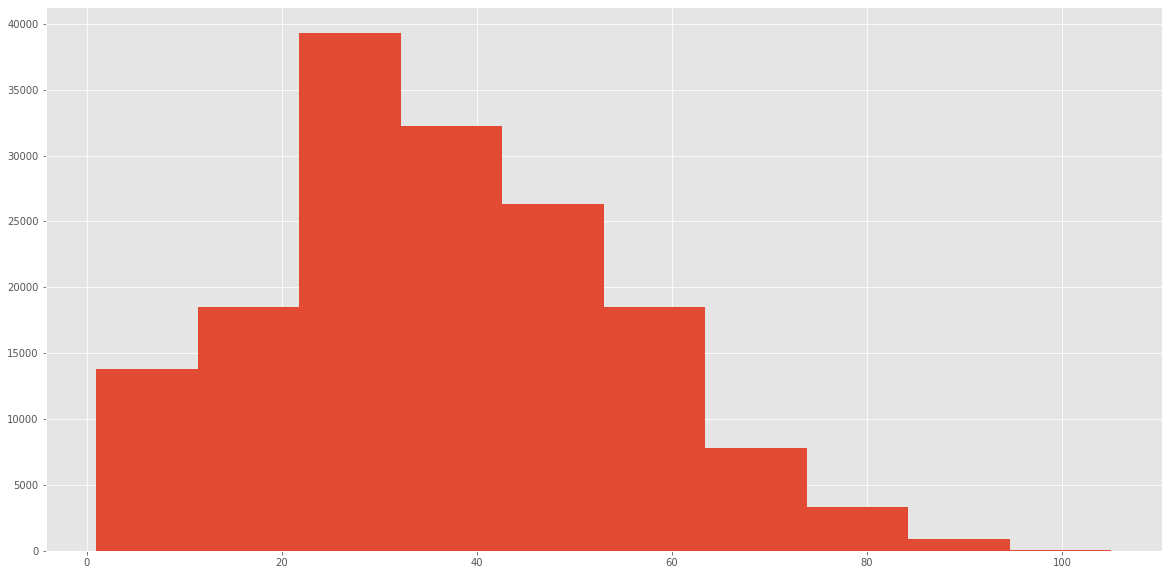

In [ ]:
df['age'].hist()

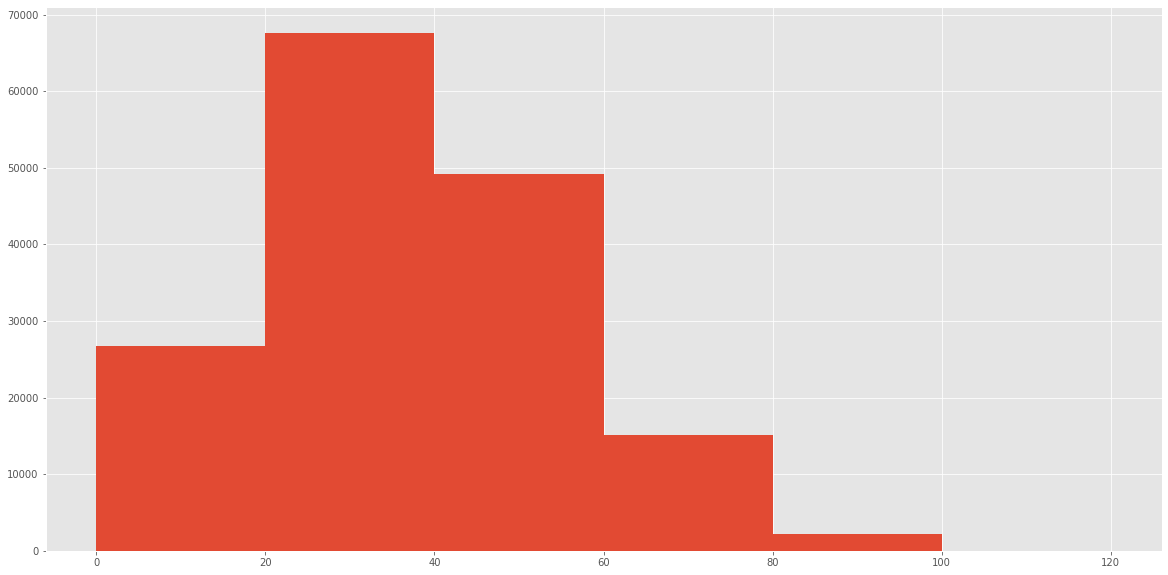

In [ ]:
df['age'].hist(bins=[0, 20, 40, 60, 80, 100, 120])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')

In [ ]:
df[df['province_of_isolation'] == 'มหาสารคาม']

,No.,announce_date,sex,age,province_of_isolation,risk
58448,875438,2021-08-14,ชาย,35.0,มหาสารคาม,อื่นๆ
58449,875439,2021-08-14,ชาย,20.0,มหาสารคาม,อื่นๆ
58450,875440,2021-08-14,ชาย,52.0,มหาสารคาม,อื่นๆ
58451,875441,2021-08-14,หญิง,52.0,มหาสารคาม,อื่นๆ
58452,875442,2021-08-14,หญิง,43.0,มหาสารคาม,อื่นๆ
...,...,...,...,...,...,...
163398,980388,2021-08-19,หญิง,38.0,มหาสารคาม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
163399,980389,2021-08-19,หญิง,32.0,มหาสารคาม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
163400,980390,2021-08-19,หญิง,56.0,มหาสารคาม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
163401,980391,2021-08-19,ชาย,50.0,มหาสารคาม,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [ ]:
mydf = df[(df['province_of_isolation'] == 'มหาสารคาม') & (df['announce_date'] == '21/8/2021')]
mydf.groupby('sex').count()['No.']

Series([], Name: No., dtype: int64)

In [ ]:
df.info()  #เช็คข้อมูลยังเป็น ojb อยู่

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160678 entries, 249 to 213056
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   No.                    160678 non-null  int64  
 1   announce_date          160678 non-null  object 
 2   sex                    160678 non-null  object 
 3   age                    160678 non-null  float64
 4   province_of_isolation  160678 non-null  object 
 5   risk                   160678 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.6+ MB


In [ ]:
df.insert(0, "date", pd.to_datetime(cv_cases['announce_date'], format='%Y-%m-%d'), True)
df

,date,No.,announce_date,sex,age,province_of_isolation,risk
249,2021-08-12,817239,2021-08-12,ชาย,48.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
250,2021-08-12,817240,2021-08-12,หญิง,19.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
251,2021-08-12,817241,2021-08-12,หญิง,37.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
252,2021-08-12,817242,2021-08-12,ชาย,46.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
253,2021-08-12,817243,2021-08-12,ชาย,60.0,เพชรบูรณ์,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...,...
213050,2021-08-21,1030040,2021-08-21,ชาย,36.0,กรุงเทพมหานคร,อื่นๆ
213053,2021-08-21,1030043,2021-08-21,ชาย,46.0,กรุงเทพมหานคร,อื่นๆ
213054,2021-08-21,1030044,2021-08-21,หญิง,31.0,กรุงเทพมหานคร,อื่นๆ
213055,2021-08-21,1030045,2021-08-21,ชาย,72.0,กรุงเทพมหานคร,อื่นๆ


In [ ]:
df.groupby('date').count()['No.']

date
2021-08-12    17229
2021-08-13    18486
2021-08-14    18507
2021-08-15    16298
2021-08-16    16145
2021-08-17    14995
2021-08-18    14386
2021-08-19    14424
2021-08-20    14893
2021-08-21    15315
Name: No., dtype: int64

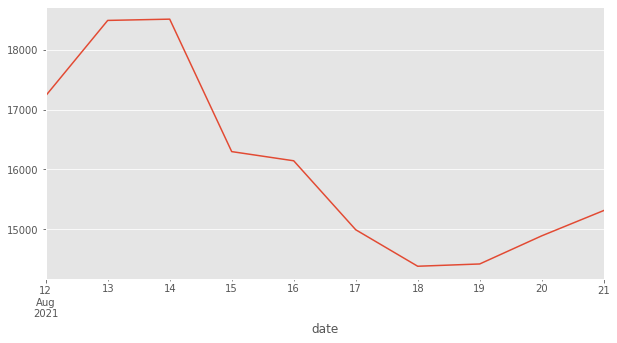

In [ ]:
df.groupby('date').count()['No.'].plot.line(figsize=(10, 5))